## S89A DL for NLP
## `Assignment 01`    	
## Handed out: 06/24/2019                             
## Due by 4:00 PM EST on Tuesday, 07/02/2019
## Submitted by: Saurabh Kulkarni

### INSTRUCTION: 

Please, describe every step of your work and present all intermediate and final results in a Word document. If you know how, please be free to organize your submission in one Jupyter notebook.  Please, copy-past text (ASCII) version of all essential commands and snippets of results into the Word document with explanations of the purpose of those commands. We cannot retype text that is in JPG images. Please, always submit a separate copy of the original, working scripts and/or class files you used. Sometimes we need to run your code and retyping is too costly. Please include in your MS Word document all the relevant portions of the console output or output files. PLEASE DO NOT EMBED files into your MS Word document. For issues and comments visit the class Piazza site.

In [107]:
## Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import collections
from nltk.corpus import wordnet as wn

### Problem 1 (25%).
Use the text of the Universal Declaration of Human Rights (UDHR). Create a table for 4 languages of your choice. Use that table to collect statistics about those languages. Place in that table the number of words in UDHR in each language, number of unique words, average length of words, number of sentences contained in UDHR and average number of words per sentence. You do not have to populate the table from your code. You may, but you may also determine individual values separately and enter them in the table manually.  Create a distribution of sentence lengths for all four language. Distribution of sentence lengths presents the number of sentences of varying length. Plot those (non-cumulative) distributions for all four languages using one diagram. 


### Solution 1:

In [68]:
from nltk.corpus import udhr

In [3]:
udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [4]:
lang = ['English-Latin1', 'Hindi-UTF8', 'Kannada-UTF8', 'Hebrew_Ivrit-Hebrew']
udhr_stats_dict = {}
sents_len_dict = {}

for l in lang:
    
    udhr_words = udhr.words(l)
    n_words = len(udhr_words)
    n_unique = len(np.unique(udhr_words))

    word_len = []
    for w in udhr_words:
        word_len.append(len(w))

    avg_word_len = np.mean(word_len)

    udhr_sents = udhr.sents(l)
    n_sents = len(udhr_sents)

    sent_len = []
    for s in udhr_sents:
        sent_len.append(len(s))
        
    sents_len_dict[l] = sent_len

    avg_sent_len = np.mean(sent_len)

    udhr_stats_dict[l] = [n_words, n_unique, avg_word_len, n_sents, avg_sent_len]

In [5]:
df_ind = ['Total Words', '# Unique Words', 'Avg. Word Length', '# Sentences', 'Avg. Sentence Length']
udhr_stats_df = pd.DataFrame(udhr_stats_dict, index=df_ind)
udhr_stats_df

,English-Latin1,Hindi-UTF8,Kannada-UTF8,Hebrew_Ivrit-Hebrew
Total Words,1781.00000,2524.000000,2529.000000,1530.000000
# Unique Words,533.00000,224.000000,278.000000,782.000000
Avg. Word Length,4.64402,1.236529,1.271649,3.960784
# Sentences,67.00000,8.000000,31.000000,71.000000
Avg. Sentence Length,26.58209,315.500000,81.580645,21.549296


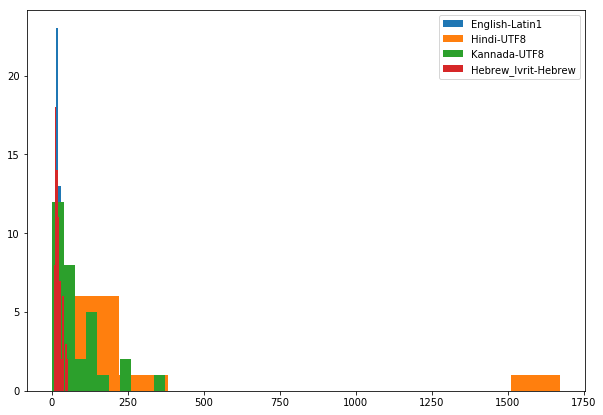

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
for l in lang:
    ax.hist(sents_len_dict[l], label=l)
ax.legend(loc='best')

### Problem 2 (25%). 
Identify 10 most frequently used words longer than 7 characters in the entire corpus of Inaugural Addresses. Do not identify 10 words for every speech but rather 10 words for the entire corpus. Which among those words has the largest number of synonyms? List all synonyms for those 10 words. Which one of those 10 words has the largest number of hyponyms? List all hyponyms of those 10 most frequently used “long” words. The purpose of this problem is to familiarize you with WordNet and concepts of synonyms and hyponyms.


In [79]:
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to /home/srk-
[nltk_data]     apts/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [80]:
inaugural_fileids = inaugural.fileids()

In [91]:
words = []
for f in inaugural_fileids:
    words_f = inaugural.words(f)
    for w in words_f:
        if len(w)>7:
            words.append(w.lower())

In [106]:
counter = collections.Counter(words)
top10_tuples = counter.most_common(10)
unzipped = zip(*top10_tuples)
top10 = list(list(unzipped)[0])

In [118]:
for w in top10:
    synonyms = []
    for synset in wn.synsets(w):
        synonyms = synonyms+synset.lemma_names()
    syn_count = len(np.unique(synonyms))
    print(w,syn_count)

government 9
citizens 1
constitution 17
american 3
national 5
congress 15
interests 12
political 1
executive 3
principles 4


In [ ]:
for w in top10:
    hyponyms = []
    for synset in wn.synsets(w):
        hyponyms = hyp_count+synset.lemma_names()
    hyp_count = len(np.unique(hyponyms))
    print(w,hyp_count)

### Problem 3. 
Consider 100 points along the straight line in $(x,y)$ plane represented by the linear equation $y=0.3x+0.2$. Distribute those points along the line uniformly in the interval between -2.0 and 3.0. To the y coordinate of each point add a random normally distributed value with standard deviation of 1 and mean 0. You have created and artificial set of random measurements. Create a shallow neural network with one layer which will be able to predict y value corresponding to any x value in the above interval. Implement and train the network using Keras API. Report on the accuracy of your model. This is a rather trivial problem and you do not need neural networks to solve it. We are practicing Keras API.


In [10]:
x = np.random.uniform(low=-2.0, high=3.0, size=100)

In [11]:
line = 0.3*x + 0.2 
noise = np.random.normal(loc=0, scale=1, size=100)
y = line+noise

In [62]:
np.random.seed(9001)
mask = np.random.rand(100) < 0.7 
x_train = x[mask]
x_test = x[~mask]
y_train = y[mask]
y_test = y[~mask]

In [63]:
model = Sequential()
# model.add(Dense(2, input_shape=(1,)))
model.add(Dense(1, input_shape=(1,)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer='sgd', loss='mse')

In [65]:
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=100,
                    verbose=1,
                    validation_data=[x_test, y_test]
                   )

Train on 64 samples, validate on 36 samples
Epoch 1/100
64/64 [==============================] - 0s 2ms/step - loss: 4.0574 - val_loss: 3.8524
Epoch 2/100
64/64 [==============================] - 0s 90us/step - loss: 3.2282 - val_loss: 3.1716
Epoch 3/100
64/64 [==============================] - 0s 149us/step - loss: 2.6307 - val_loss: 2.6859
Epoch 4/100
64/64 [==============================] - 0s 113us/step - loss: 2.2207 - val_loss: 2.3368
Epoch 5/100
64/64 [==============================] - 0s 139us/step - loss: 1.8966 - val_loss: 2.0868
Epoch 6/100
64/64 [==============================] - 0s 128us/step - loss: 1.6762 - val_loss: 1.9111
Epoch 7/100
64/64 [==============================] - 0s 123us/step - loss: 1.5219 - val_loss: 1.7830
Epoch 8/100
64/64 [==============================] - 0s 87us/step - loss: 1.4092 - val_loss: 1.6905
Epoch 9/100
64/64 [==============================] - 0s 79us/step - loss: 1.3269 - val_loss: 1.6244
Epoch 10/100
64/64 [==============================] 

64/64 [==============================] - 0s 162us/step - loss: 1.0903 - val_loss: 1.3961
Epoch 82/100
64/64 [==============================] - 0s 122us/step - loss: 1.0921 - val_loss: 1.3963
Epoch 83/100
64/64 [==============================] - 0s 149us/step - loss: 1.0904 - val_loss: 1.3964
Epoch 84/100
64/64 [==============================] - 0s 145us/step - loss: 1.0923 - val_loss: 1.3961
Epoch 85/100
64/64 [==============================] - 0s 129us/step - loss: 1.0910 - val_loss: 1.3961
Epoch 86/100
64/64 [==============================] - 0s 134us/step - loss: 1.0908 - val_loss: 1.3959
Epoch 87/100
64/64 [==============================] - 0s 144us/step - loss: 1.0895 - val_loss: 1.3960
Epoch 88/100
64/64 [==============================] - 0s 116us/step - loss: 1.0916 - val_loss: 1.3960
Epoch 89/100
64/64 [==============================] - 0s 148us/step - loss: 1.0897 - val_loss: 1.3959
Epoch 90/100
64/64 [==============================] - 0s 162us/step - loss: 1.0926 - val_loss: 

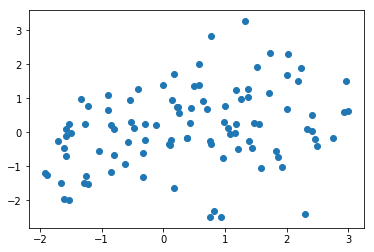

In [59]:
plt.scatter(x, y)

In [60]:
y_pred = model.predict(x_test)

In [61]:
r2_score(y_test, y_pred)

-0.0011379086751754919

### Problem 4.  
Consider three points in (x,y) plane with coordinates (-2,0), (0,1.7) and (2.1,0). Around each of those three centers create a cloud of 100 randomly generated points. For the radial distance of any one of those points from its center use a random normal distribution.  For the angular coordinate of any one of “cloud” points use the uniform distribution. Once you have generated all three sets of cloud points plot them in the same diagram using three different colors. There should exist some overlap between the clouds. Create a two-layer neural network. Use Keras API. Fit a model that could predict whether a randomly generated point in the plane belongs to cloud 1, centered around (-2,0), cloud 2, centered around (0,1.7) or cloud 3, centered around (2.1,0). You can make that prediction in a much simpler way, however, we are practicing Keras API.